https://tykimos.github.io/2017/05/22/Evaluation_Talk/

# 평가

## 분류의 성능 평가 지표

정확도 

오차행렬

정밀도

재현율

F1 스코어

ROC AUC

## 정확도

$$
\text{정확도(Accuracy)} = \frac{\text{예측 결과가 동일한 데이터 건수}}{\text{전체 예측 데이터 건수}}
$$

데이터가 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아님.

ex) 100개의 데이터가 있고 이 중에 90개의 데이터 레이블이 0, 단 10개의 데이터 레이블이 1 이라고 한다면 무조건 0으로 예측 결과를 반환 하는 ML 모델의 경우라도 정확도가 90%가 됨.

## 오차 행렬

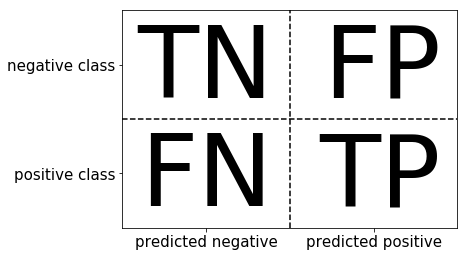

In [6]:
from sklearn.metrics import confusion_matrix
mglearn.plots.plot_binary_confusion_matrix()

- TN :  예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0

- FP :  예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0

- FN :  예측값을 Negative 값 0으로 예측는데 실제 값은 Positive 값 1

- TP :  예측값을 Positive 값 0으로 예측했고 실제 값 역시 Positive 값 1

$$
\text{정확도} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다는 Negative로 예측 정확도가 높아지는 경우가 발생함.

10,000건의 데이터 세트에서 9,900건이 Negative이고 100건이 Positive라면 Neagtive로 에측하는 경향이 더 강해져서 TN은 매우 커지고 TP는 매우 작아지게 됨.

또한 Negative로 예측할 때 정확도가 높기 때문에 PN이 매우 작고, Positive로 예측하는 경우가 작기 때문에 FP 역시 매우 작아짐. 결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게 됨.

## 정확도와 재현율

$$
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

$$
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

**정밀도**는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻함.

Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고도 불림.

**재현을**은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻함.

민감도 또는 TPR(True Positive Rate)라고도 불림

- 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(스팸 메일)

- 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 에측을 Negative 음성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(암 판단 모델, 금융 사기 적발 모델)

재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN(실제 Positive, 예측 Negative)를 낮추는데, 정밀도는 FP(실제 Negative, 에측 Positive)를 낮추는데 초점을 맞춤.

가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것. 반면에 둘 중 어느 한 평가 지표만 매우 높고, 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않음.

## 정밀도/재현율 트레이드오프

정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움.

이를 정밀도/재현율 트레이드오프라고 부름.

## 정밀도와 재현율의 맹정

**정밀도가 100%가 되는 방법**

확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 에측함.

ex)전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 Positive로 예측하고 나머지는 모두 Negative로 예측하더라고 정밀도는 100%가 됨.

**재현율이 100%가 되는 방법**

모든 환자를 Positive로 예측하면 됨. 전체 환자 1000명을 다 Positive로 예측하면, 이 중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 아예 0 이므로 100%가 됨.

이처럼 어느 한쪽만 참조하면 극단적인 수치 조작이 가능함. 따라서 정밀도 또는 재현율 중 하나만 좋고 다른 하나는 스코어가 나쁜 분류는 성능이 좋지 않은 분류로 간주 할 수 있음.

## F1 스코어

$$
\text{F1} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
$$

F1 스코어는 정밀도와 재현율을 결합한 지표. F1 스코어는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐.

ex) A 예측 모델의 경우 정밀도가 0.9 재현율이 0.1로 극단적인 차이가 나고, B 예측 모델은 정밀도가 0.5, 재현율이 0.5로 정밀도왕 재현율이 큰 차이가 없다면, A 예측 모델의 F1 스코어는 0.18이고, B 예측 모델의 F1 스코어는 0.5로 B 모델이 A 모델에 비해 매우 우수한 F1 스코어를 가지게 됨.

## ROC 곡선과 AUC

ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변화하는지를 나타내는 곡선. FPR을 X 축으로, TPR을 Y 축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타남.

- 민감도(TPR,재현율)는 실제값 Positive가 정확히 예측돼야 하는 수준을 나타냄.

- 특이성(TNR,True Negative Rate)은 실제값 Negative가 정확히 예측돼야 하는 수준을 나타냄.

$$
\text{TNR} = \frac{\text{TN}}{\text{FP} + \text{TN}}
$$

ROC 곡선의 X 축 기준인 FPR은 1 - TNR 또는 1 - 특이성으로 표현됨.

ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것.

https://docs.eyesopen.com/toolkits/cookbook/python/plotting/fprocs.html

일반적으로 ROC 곡선 자체는 FPR과 TPR의 변환 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC값 으로 결정함.

AUC 값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치. AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건.

AIC : https://blog.naver.com/euleekwon/221465294530